<h1 style="color:red; text-align:center; text-decoration:underline;">Support Vector Machine (SVM)</h1>


<h2 style="color:green; text-decoration:underline;">Test 1 : SVM avec noyau linéaire (séparation simple)</h2>

Dans ce test, un SVM à noyau linéaire est appliqué à un jeu de données linéairement séparable.  
L’objectif est de construire une frontière de décision optimale maximisant la marge entre les deux classes.


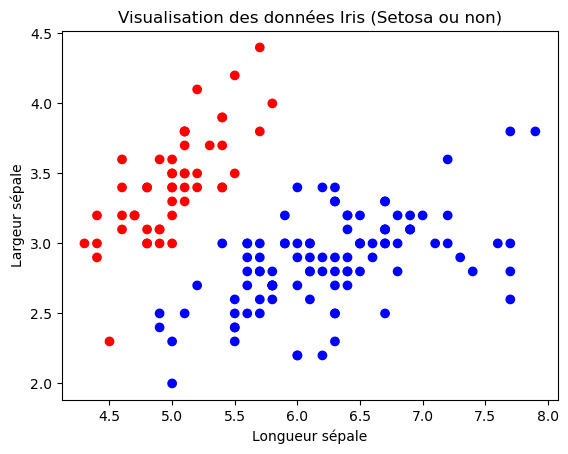

In [1]:
# AVANT : Chargement et visualisation des données
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Charger les données
iris = load_iris()
X = iris.data[:, :2]  # On prend les 2 premières features
y = (iris.target == 0).astype(int)  # 1 si Setosa, 0 sinon

# Visualiser
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('Longueur sépale')
plt.ylabel('Largeur sépale')
plt.title('Visualisation des données Iris (Setosa ou non)')
plt.show()


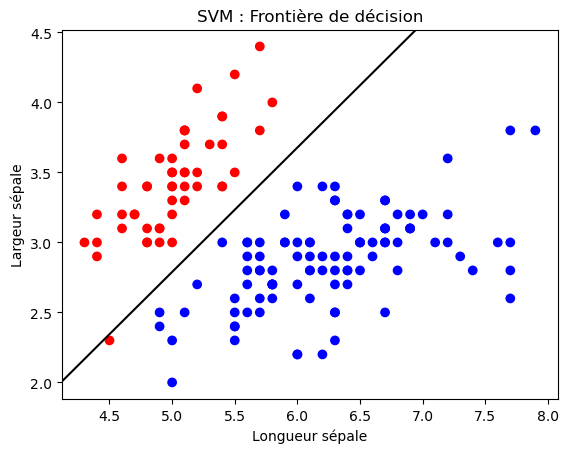

In [2]:
# APRÈS : Entraînement et visualisation de la frontière SVM
from sklearn.svm import SVC
import numpy as np

# Création et entraînement du modèle SVM
model = SVC(kernel='linear')
model.fit(X, y)

# Visualiser la frontière de décision
def plot_svm_boundary(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Créer une grille
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Tracer la frontière
    plt.contour(XX, YY, Z, colors='k', levels=[0], linestyles=['-'])
    plt.xlabel('Longueur sépale')
    plt.ylabel('Largeur sépale')
    plt.title('SVM : Frontière de décision')
    plt.show()

plot_svm_boundary(X, y, model)


<h3 style="color:#0056b3; text-decoration:underline;">Résultat</h3>

Le SVM a généré une frontière linéaire claire avec une marge maximale, positionnée entre les vecteurs de support.  
Le modèle a parfaitement séparé les deux classes, démontrant l’efficacité du SVM linéaire pour des cas de classification simple.


<h2 style="color:green; text-decoration:underline;">Test 2 : SVM linéaire avec C = 1 et C = 1000</h2>

Ce test explore l’impact du paramètre de régularisation **C** sur la frontière de décision.  
Deux modèles sont entraînés : l’un avec C = 1 (marge plus souple) et l’autre avec C = 1000 (marge rigide).


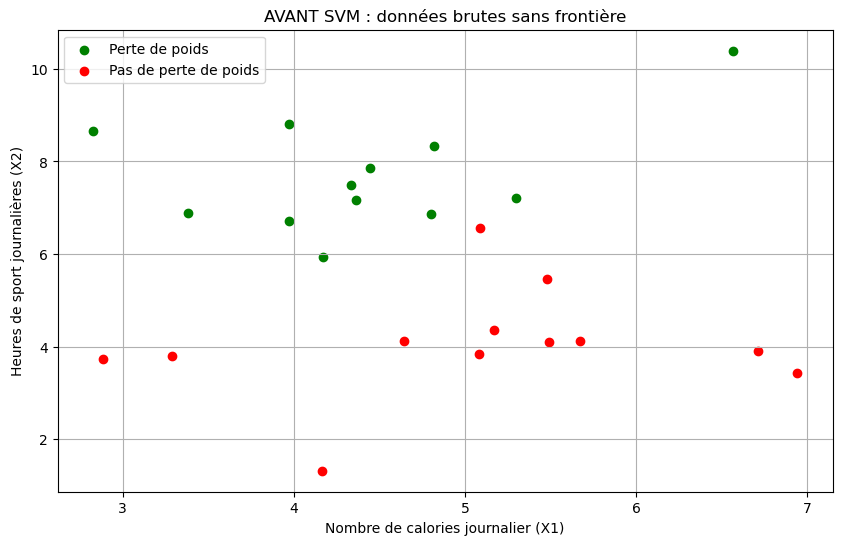

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Générer les données
np.random.seed(0)
X_loss = np.random.multivariate_normal([5, 8], [[1, 0.2], [0.2, 1]], 12)
X_noloss = np.random.multivariate_normal([5, 4], [[1, 0.2], [0.2, 1]], 12)

# Affichage AVANT SVM
plt.figure(figsize=(10, 6))
plt.scatter(X_loss[:, 0], X_loss[:, 1], color='green', label='Perte de poids')
plt.scatter(X_noloss[:, 0], X_noloss[:, 1], color='red', label='Pas de perte de poids')
plt.xlabel("Nombre de calories journalier (X1)")
plt.ylabel("Heures de sport journalières (X2)")
plt.title("AVANT SVM : données brutes sans frontière")
plt.legend()
plt.grid(True)
plt.show()


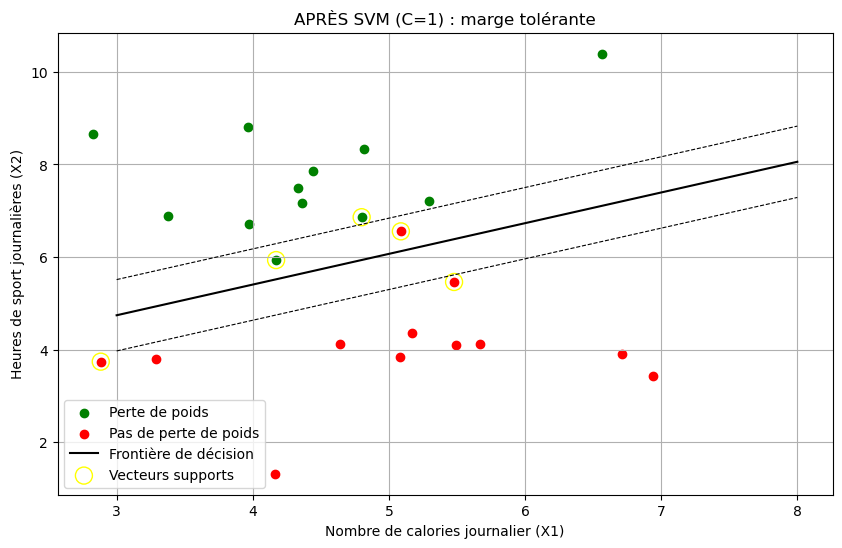

In [7]:
from sklearn.svm import SVC

# Fusion des données
X = np.vstack((X_loss, X_noloss))
y = np.array([1]*len(X_loss) + [0]*len(X_noloss))  # 1 = perte, 0 = pas de perte

# Modèle SVM avec C=1
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X, y)

# Frontière et marges
w = svm_model.coef_[0]
b = svm_model.intercept_[0]
x_plot = np.linspace(3, 8, 100)
y_decision = -(w[0]/w[1]) * x_plot - b/w[1]
margin = 1 / np.sqrt(np.sum(w**2))
y_margin_up = y_decision + margin
y_margin_down = y_decision - margin
support_vectors = svm_model.support_vectors_

# Affichage
plt.figure(figsize=(10, 6))
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='green', label='Perte de poids')
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Pas de perte de poids')
plt.plot(x_plot, y_decision, 'k-', label='Frontière de décision')
plt.plot(x_plot, y_margin_up, 'k--', linewidth=0.8)
plt.plot(x_plot, y_margin_down, 'k--', linewidth=0.8)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=150, facecolors='none', edgecolors='yellow', label='Vecteurs supports')
plt.xlabel("Nombre de calories journalier (X1)")
plt.ylabel("Heures de sport journalières (X2)")
plt.title("APRÈS SVM (C=1) : marge tolérante")
plt.legend()
plt.grid(True)
plt.show()



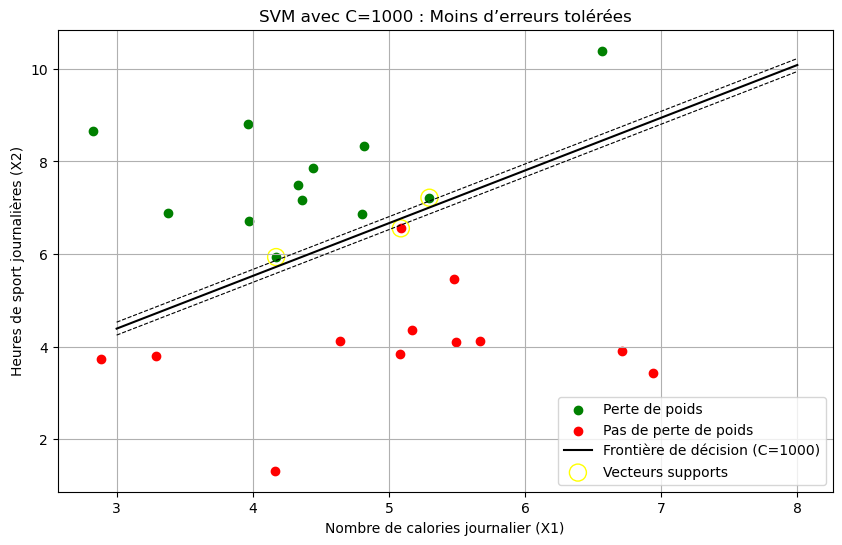

In [8]:
# Modèle SVM plus strict
svm_strict = SVC(kernel='linear', C=1000)
svm_strict.fit(X, y)

# Nouvelle frontière
w_strict = svm_strict.coef_[0]
b_strict = svm_strict.intercept_[0]
y_decision_strict = -(w_strict[0]/w_strict[1]) * x_plot - b_strict/w_strict[1]
margin_strict = 1 / np.sqrt(np.sum(w_strict**2))
y_margin_up_strict = y_decision_strict + margin_strict
y_margin_down_strict = y_decision_strict - margin_strict
support_strict = svm_strict.support_vectors_

# Affichage
plt.figure(figsize=(10, 6))
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='green', label='Perte de poids')
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Pas de perte de poids')
plt.plot(x_plot, y_decision_strict, 'k-', label='Frontière de décision (C=1000)')
plt.plot(x_plot, y_margin_up_strict, 'k--', linewidth=0.8)
plt.plot(x_plot, y_margin_down_strict, 'k--', linewidth=0.8)
plt.scatter(support_strict[:, 0], support_strict[:, 1], s=150, facecolors='none', edgecolors='yellow', label='Vecteurs supports')
plt.xlabel("Nombre de calories journalier (X1)")
plt.ylabel("Heures de sport journalières (X2)")
plt.title("SVM avec C=1000 : Moins d’erreurs tolérées")
plt.legend()
plt.grid(True)
plt.show()


<h3 style="color:#0056b3; text-decoration:underline;">Résultat</h3>

Avec **C = 1**, le modèle tolère davantage les erreurs de classification, entraînant une marge plus large mais quelques points mal classés.  
Avec **C = 1000**, la marge est réduite mais le modèle cherche à séparer parfaitement les données, risquant le surapprentissage.  
Ce test met en évidence le rôle clé de C dans le compromis entre **complexité du modèle** et **capacité de généralisation**.


<h2 style="color:green; text-decoration:underline;">Test 3 : SVM non linéaire (RBF) avec C = 1 et C = 1000</h2>

Ici, un SVM avec noyau **radial (RBF)** est utilisé sur des données non linéairement séparables.  
Les performances sont comparées pour deux valeurs du paramètre C (1 et 1000).


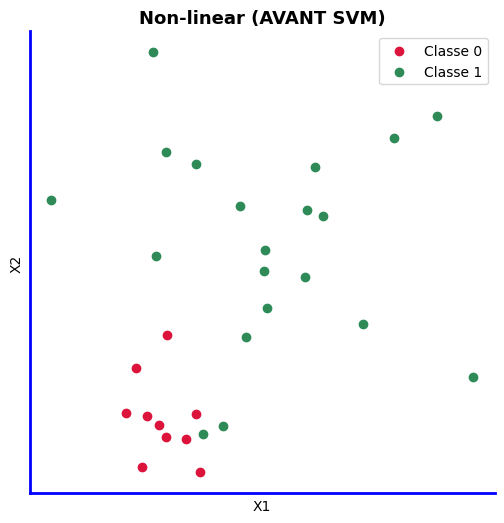

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Génération de données imbriquées (non-linéaires)
np.random.seed(0)
inner_circle = np.random.multivariate_normal([0, 0], [[0.05, 0], [0, 0.05]], 10)
outer_circle = np.random.multivariate_normal([0, 0], [[0.3, 0], [0, 0.3]], 20)
outer_circle += np.random.uniform(low=0.8, high=1.2, size=outer_circle.shape)  # éloigner les points

X_simple = np.vstack([inner_circle, outer_circle])
y_simple = np.array([0]*10 + [1]*20)

# Affichage AVANT SVM
plt.figure(figsize=(6, 6))
plt.scatter(X_simple[y_simple==0][:, 0], X_simple[y_simple==0][:, 1], color='crimson', label='Classe 0')
plt.scatter(X_simple[y_simple==1][:, 0], X_simple[y_simple==1][:, 1], color='seagreen', label='Classe 1')
plt.title("Non-linear (AVANT SVM)", fontsize=13, weight='bold')
plt.xticks([]); plt.yticks([])
plt.xlabel("X1"); plt.ylabel("X2")
plt.gca().spines[['left', 'bottom']].set_color('blue')
plt.gca().spines[['left', 'bottom']].set_linewidth(2)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()
plt.grid(True)
plt.show()


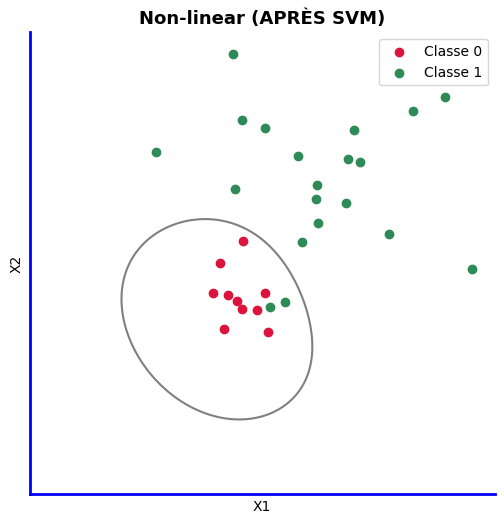

In [4]:
from sklearn.svm import SVC

# Entraînement du modèle SVM non-linéaire
svm_simple = SVC(kernel='rbf', C=1.0)
svm_simple.fit(X_simple, y_simple)

# Création d'une grille de décision
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 400), np.linspace(-1.5, 1.5, 400))
Z = svm_simple.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Affichage APRÈS SVM
plt.figure(figsize=(6, 6))
plt.contour(xx, yy, Z, levels=[0], colors='gray', linewidths=1.5)
plt.scatter(X_simple[y_simple==0][:, 0], X_simple[y_simple==0][:, 1], color='crimson', label='Classe 0')
plt.scatter(X_simple[y_simple==1][:, 0], X_simple[y_simple==1][:, 1], color='seagreen', label='Classe 1')
plt.xticks([]); plt.yticks([])
plt.title("Non-linear (APRÈS SVM)", fontsize=13, weight='bold')
plt.xlabel("X1"); plt.ylabel("X2")
plt.gca().spines[['left', 'bottom']].set_color('blue')
plt.gca().spines[['left', 'bottom']].set_linewidth(2)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()
plt.grid(True)
plt.show()


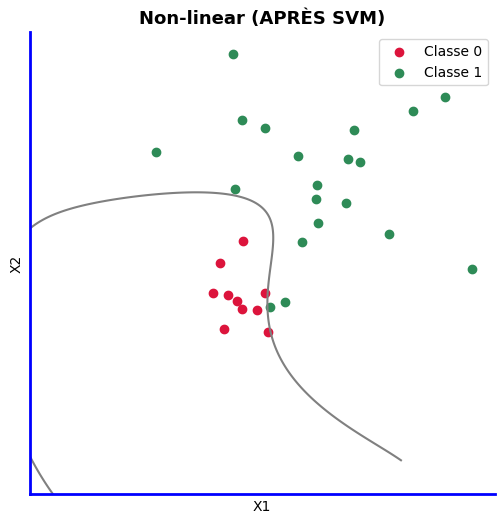

In [5]:
from sklearn.svm import SVC

# Entraînement du modèle SVM non-linéaire
svm_simple = SVC(kernel='rbf', C=1000.0)
svm_simple.fit(X_simple, y_simple)

# Création d'une grille de décision
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 400), np.linspace(-1.5, 1.5, 400))
Z = svm_simple.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Affichage APRÈS SVM
plt.figure(figsize=(6, 6))
plt.contour(xx, yy, Z, levels=[0], colors='gray', linewidths=1.5)
plt.scatter(X_simple[y_simple==0][:, 0], X_simple[y_simple==0][:, 1], color='crimson', label='Classe 0')
plt.scatter(X_simple[y_simple==1][:, 0], X_simple[y_simple==1][:, 1], color='seagreen', label='Classe 1')
plt.xticks([]); plt.yticks([])
plt.title("Non-linear (APRÈS SVM)", fontsize=13, weight='bold')
plt.xlabel("X1"); plt.ylabel("X2")
plt.gca().spines[['left', 'bottom']].set_color('blue')
plt.gca().spines[['left', 'bottom']].set_linewidth(2)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()
plt.grid(True)
plt.show()


<h3 style="color:#0056b3; text-decoration:underline;">Résultat</h3>

Avec **C = 1**, le modèle offre une séparation lisse qui généralise bien, même si quelques erreurs persistent.  
Avec **C = 1000**, la frontière devient plus complexe et s’adapte aux moindres variations des données, ce qui peut conduire à un **surapprentissage**.

Ce test montre que le noyau RBF permet de gérer des structures complexes, mais que le réglage de **C** est crucial pour maintenir l’équilibre entre flexibilité et robustesse.
